In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Set option to display max columns i.e (Display all the columns of the dataframe).
pd.pandas.set_option('display.max_columns',None)

In [2]:
data_train=pd.read_csv('House Pricing Dataset/train.csv')
data_test=pd.read_csv('House Pricing Dataset/test.csv')
dataset = [data_train,data_test]
df = pd.concat(dataset).reset_index(drop=True)
df.head()
df.shape

(2919, 81)

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [5]:
# Let's first deal with categorical nan values.
categorical_feature_nan = [i for i in df.columns if df[i].isnull().sum()>0 and df[i].dtype == 'O']
for i in categorical_feature_nan:
    print(i, df[i].isnull().sum())

MSZoning 4
Alley 2721
Utilities 2
Exterior1st 1
Exterior2nd 1
MasVnrType 1766
BsmtQual 81
BsmtCond 82
BsmtExposure 82
BsmtFinType1 79
BsmtFinType2 80
Electrical 1
KitchenQual 1
Functional 2
FireplaceQu 1420
GarageType 157
GarageFinish 159
GarageQual 159
GarageCond 159
PoolQC 2909
Fence 2348
MiscFeature 2814
SaleType 1


In [6]:
# NA have some meanings according to data description.
df[categorical_feature_nan] = df[categorical_feature_nan].fillna('NA')
df.head()
df[categorical_feature_nan].isnull().sum()

MSZoning        0
Alley           0
Utilities       0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
KitchenQual     0
Functional      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
SaleType        0
dtype: int64

In [7]:
# Now, deal with numerical missing values
numerical_feature_nan = [i for i in df.columns if df[i].isnull().sum()>0 
                         and df[i].dtype != 'O'
                         and i not in ['SalePrice'] ]
for i in numerical_feature_nan:
    print(i, df[i].isnull().sum())

LotFrontage 486
MasVnrArea 23
BsmtFinSF1 1
BsmtFinSF2 1
BsmtUnfSF 1
TotalBsmtSF 1
BsmtFullBath 2
BsmtHalfBath 2
GarageYrBlt 159
GarageCars 1
GarageArea 1


In [8]:
# Now, fill missing values with median coz data has many outliers so filling with mean or mode is not best for dataset.
for i in numerical_feature_nan:
    mod_value = df[i].mode()[0]
    df[i].fillna(mod_value, inplace=True)
df[numerical_feature_nan].isnull().sum()

LotFrontage     0
MasVnrArea      0
BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
GarageYrBlt     0
GarageCars      0
GarageArea      0
dtype: int64

In [9]:
from pandas.api.types import CategoricalDtype
df['BsmtCond'] = df['BsmtCond'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df['BsmtExposure'] = df['BsmtExposure'].astype(CategoricalDtype(categories=['NA', 'No', 'Mn', 'Av', 'Gd'], ordered = True)).cat.codes
df['BsmtFinType1'] = df['BsmtFinType1'].astype(CategoricalDtype(categories=['NA', 'Unf', 'LwQ', 'Rec', 'BLQ','ALQ', 'GLQ'], ordered = True)).cat.codes
df['BsmtFinType2'] = df['BsmtFinType2'].astype(CategoricalDtype(categories=['NA', 'Unf', 'LwQ', 'Rec', 'BLQ','ALQ', 'GLQ'], ordered = True)).cat.codes
df['BsmtQual'] = df['BsmtQual'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df['ExterQual'] = df['ExterQual'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df['ExterCond'] = df['ExterCond'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df['Functional'] = df['Functional'].astype(CategoricalDtype(categories=['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod','Min2','Min1', 'Typ'], ordered = True)).cat.codes
df['GarageCond'] = df['GarageCond'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df['GarageQual'] = df['GarageQual'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df['GarageFinish'] = df['GarageFinish'].astype(CategoricalDtype(categories=['NA', 'Unf', 'RFn', 'Fin'], ordered = True)).cat.codes
df['HeatingQC'] = df['HeatingQC'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df['KitchenQual'] = df['KitchenQual'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df['PavedDrive'] = df['PavedDrive'].astype(CategoricalDtype(categories=['N', 'P', 'Y'], ordered = True)).cat.codes
df['Utilities'] = df['Utilities'].astype(CategoricalDtype(categories=['ELO', 'NASeWa', 'NASeWr', 'AllPub'], ordered = True)).cat.codes
df['Street'] = df['Street'].astype(CategoricalDtype(categories=['Grvl', 'Pave'], ordered = True)).cat.codes
df['Alley'] = df['Alley'].astype(CategoricalDtype(categories=['NA','Grvl', 'Pave'], ordered = True)).cat.codes
df['LotShape'] = df['LotShape'].astype(CategoricalDtype(categories=['IR3', 'IR2', 'IR1', 'Reg'], ordered = True)).cat.codes
df['LandContour'] = df['LandContour'].astype(CategoricalDtype(categories=['Low', 'HLS', 'Bnk', 'Lvl'], ordered = True)).cat.codes
df['LandSlope'] = df['LandSlope'].astype(CategoricalDtype(categories=['Sev', 'Mod', 'Gtl'], ordered = True)).cat.codes
df['Electrical'] = df['Electrical'].astype(CategoricalDtype(categories=['Mix', 'FuseP', 'FuseF', 'FuseA', 'Sbrkr'], ordered = True)).cat.codes
df['FireplaceQu'] = df['FireplaceQu'].astype(CategoricalDtype(categories=['NA', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df['GarageType'] = df['GarageType'].astype(CategoricalDtype(categories=['NA', 'Detchd', 'CarPort', 'BuiltIn', 'Basment', 'Attchd', '2Types'], ordered = True)).cat.codes
df['PoolQC'] = df['PoolQC'].astype(CategoricalDtype(categories=['NA', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df['Fence'] = df['Fence'].astype(CategoricalDtype(categories=['NA', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv'], ordered = True)).cat.codes


In [10]:
numeric = [i for i in df.columns if df[i].dtype != 'O']
numeric

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LandSlope',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'PoolQC',
 'Fence',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

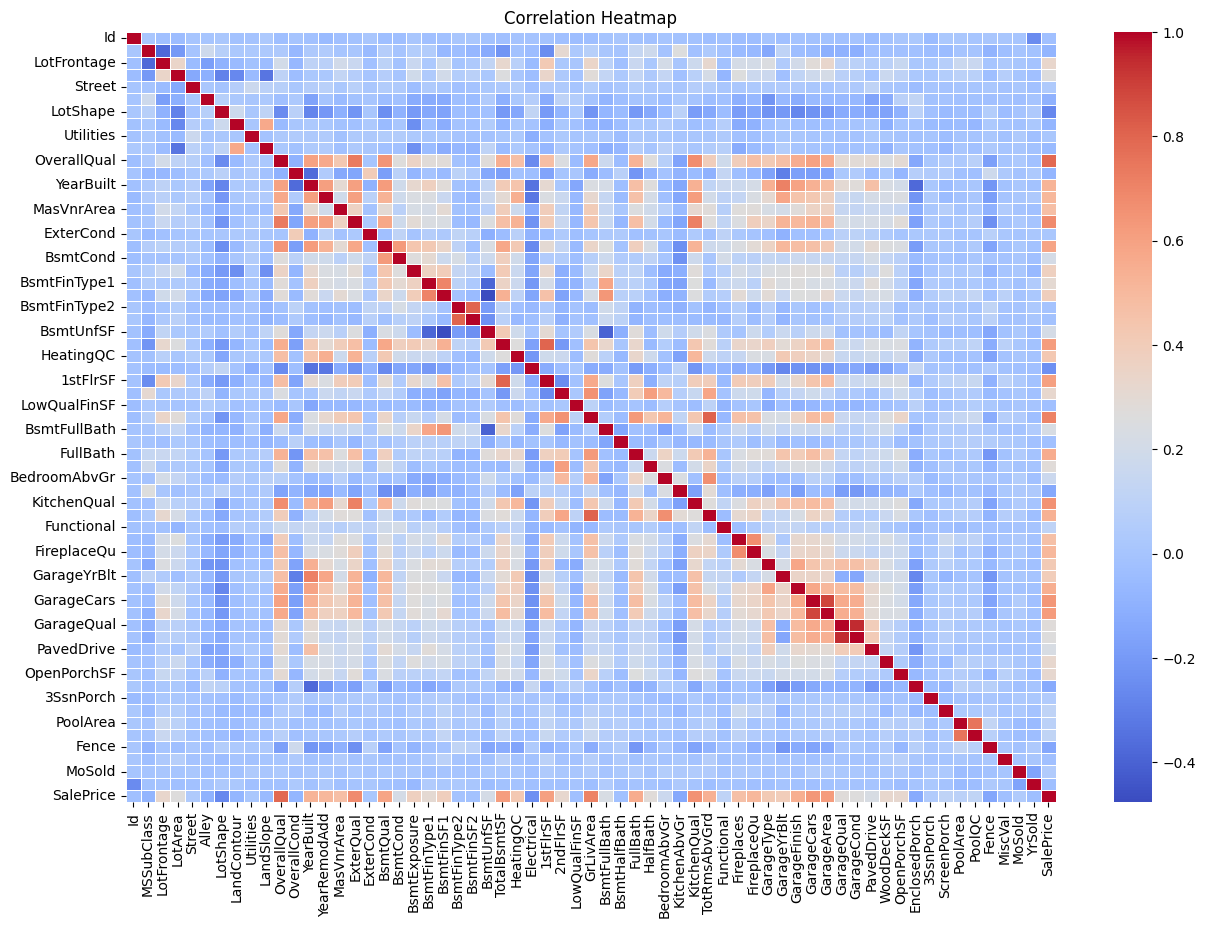

In [11]:
corr_matrix = df.select_dtypes(include=['int8', 'int64', 'float64']).corr()

# Heatmap of correlations
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [12]:
correlation = corr_matrix.corr()
print(correlation['SalePrice'].sort_values(ascending=False), '\n')

SalePrice        1.000000
OverallQual      0.969007
KitchenQual      0.926968
ExterQual        0.926863
GarageCars       0.909096
                   ...   
OverallCond     -0.504495
EnclosedPorch   -0.523298
Fence           -0.579926
Electrical      -0.653118
LotShape        -0.741072
Name: SalePrice, Length: 63, dtype: float64 



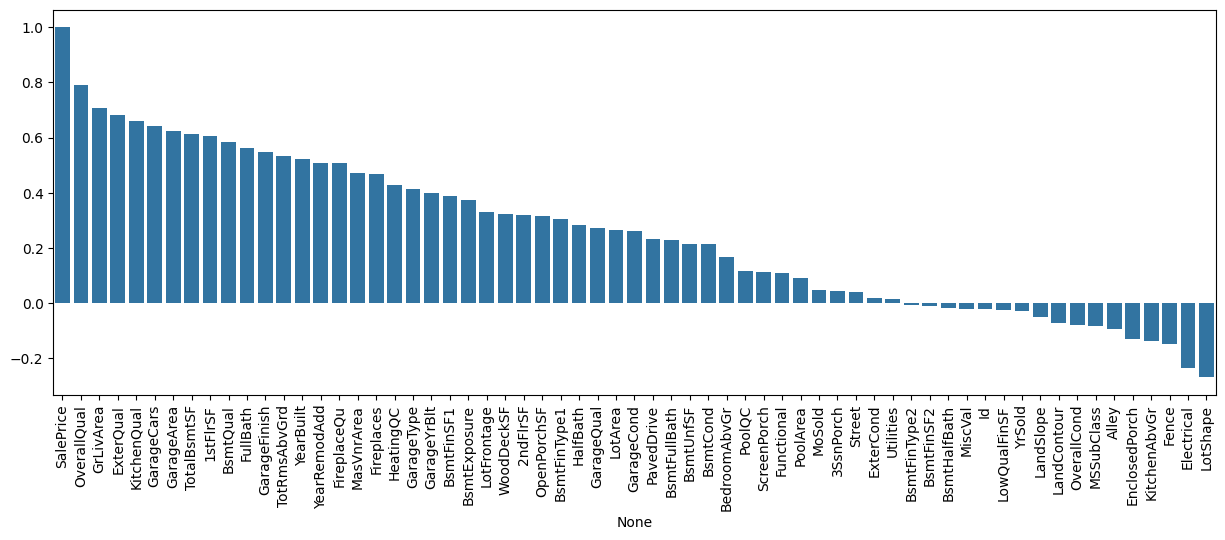

In [13]:
corr_SalePrice = corr_matrix['SalePrice'].sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(15, 5))# Create a seaborn bar chart
sns.barplot(x=corr_SalePrice.index, y=corr_SalePrice.values)

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=90)
plt.show()

In [14]:
top_40_features = corr_SalePrice.head(40).index 

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_26827/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


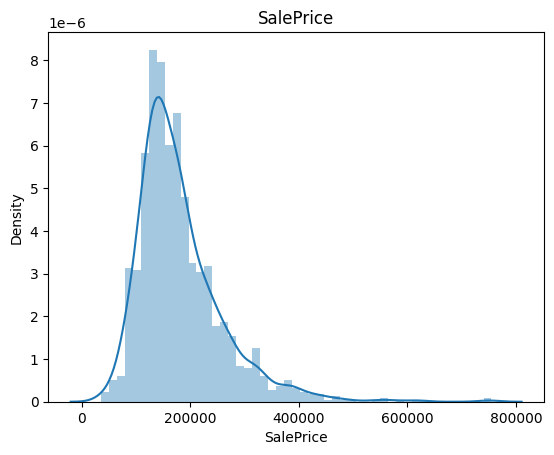

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_26827/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


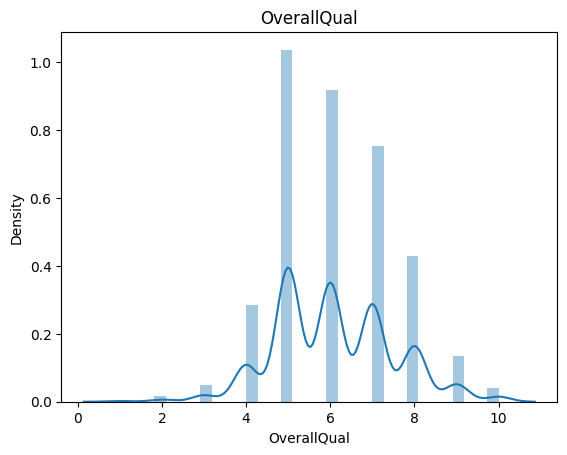

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_26827/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


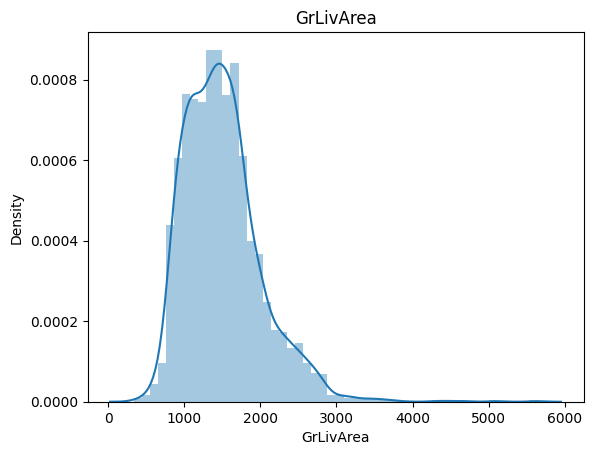

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_26827/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


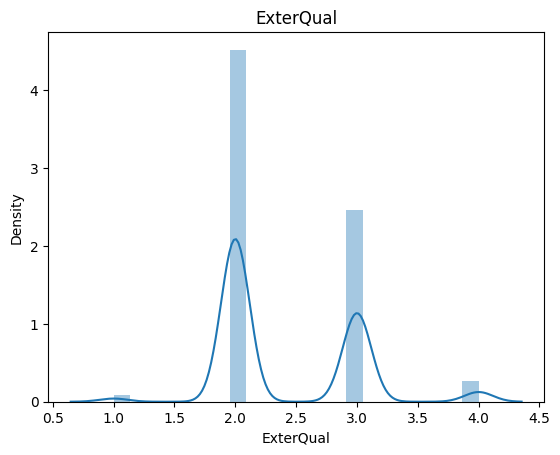

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_26827/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


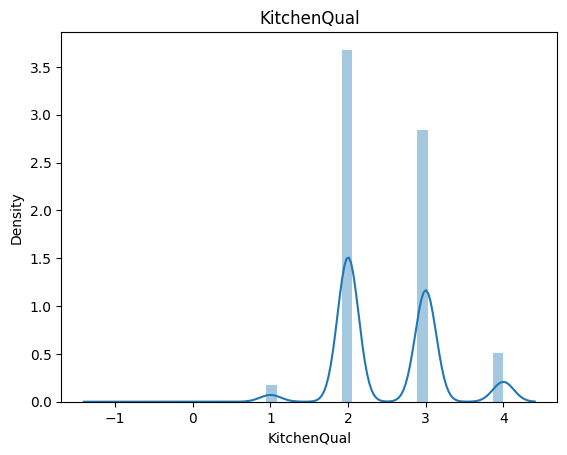

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_26827/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


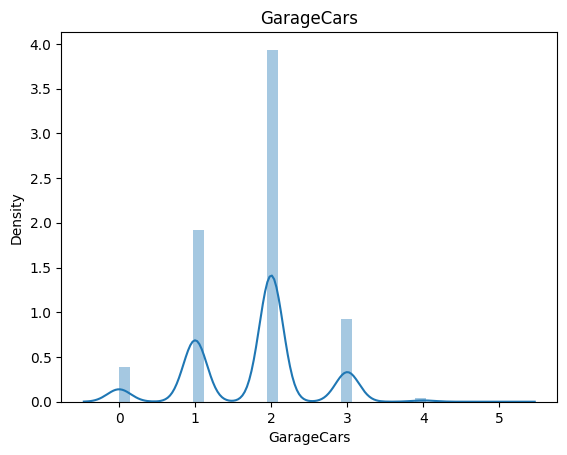

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_26827/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


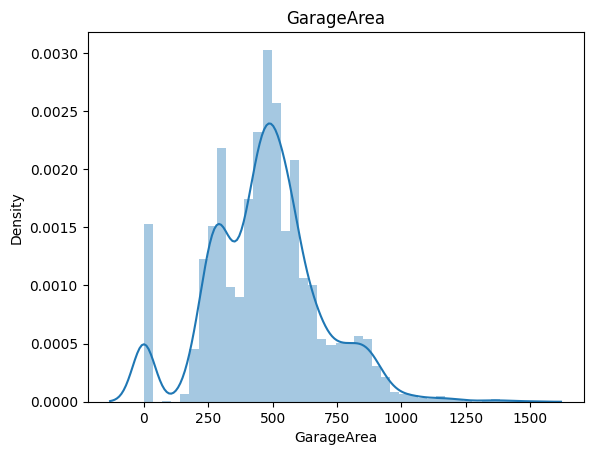

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_26827/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


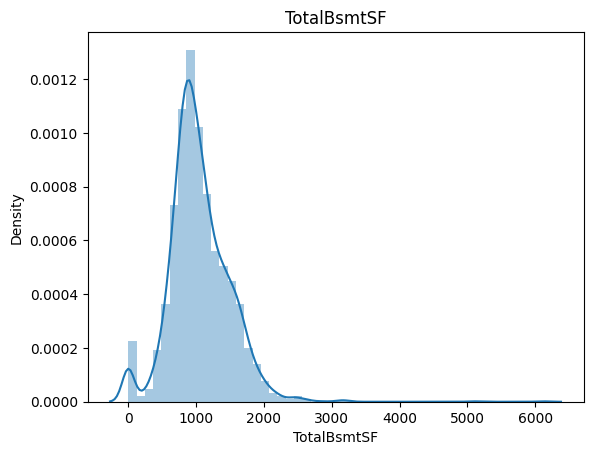

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_26827/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


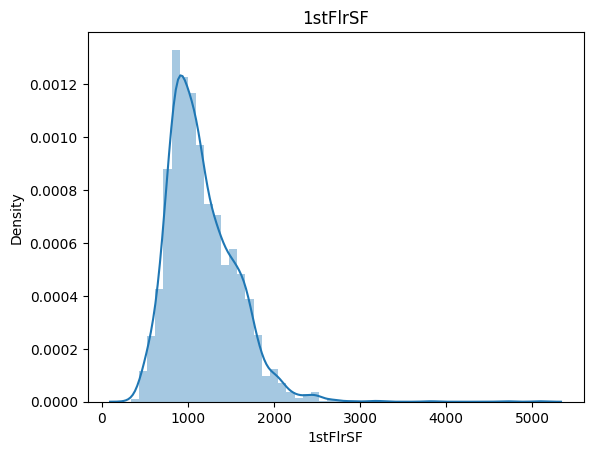

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_26827/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


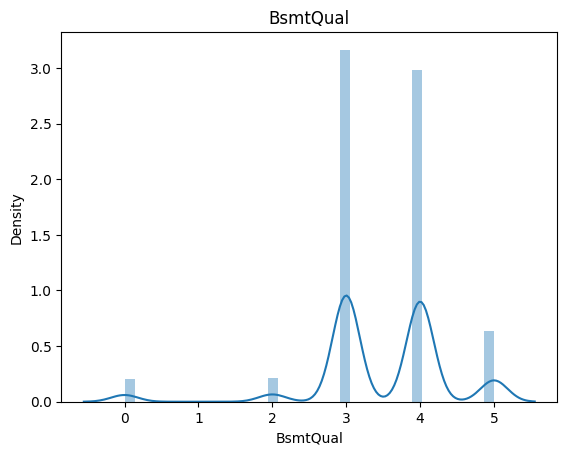

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_26827/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


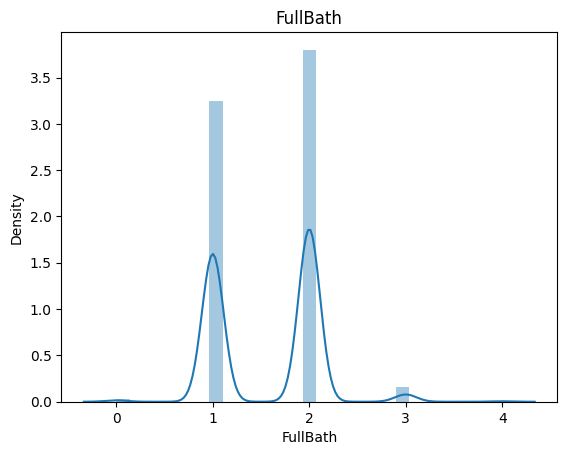

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_26827/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


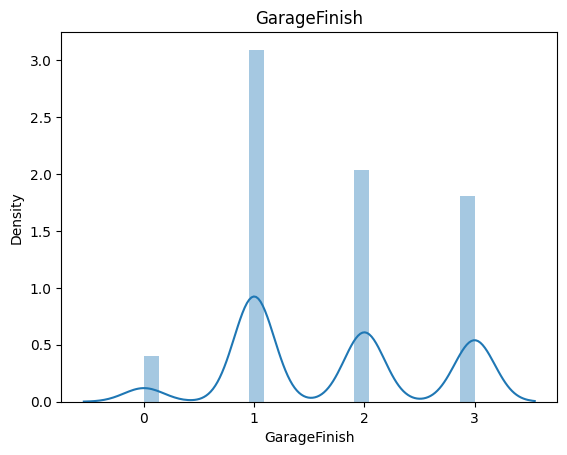

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_26827/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


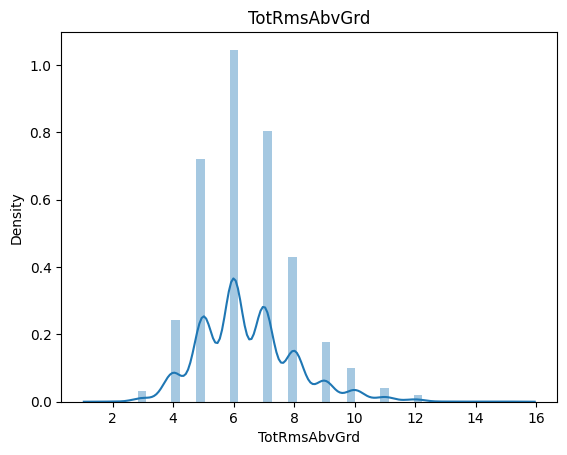

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_26827/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


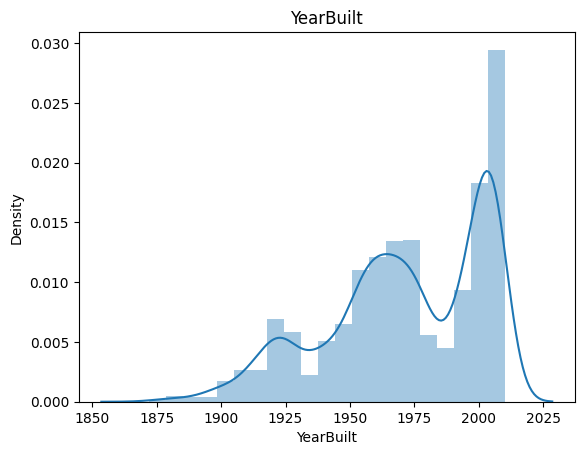

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_26827/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


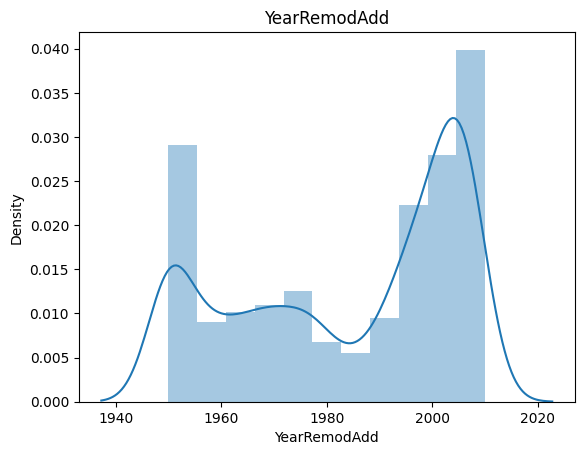

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_26827/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


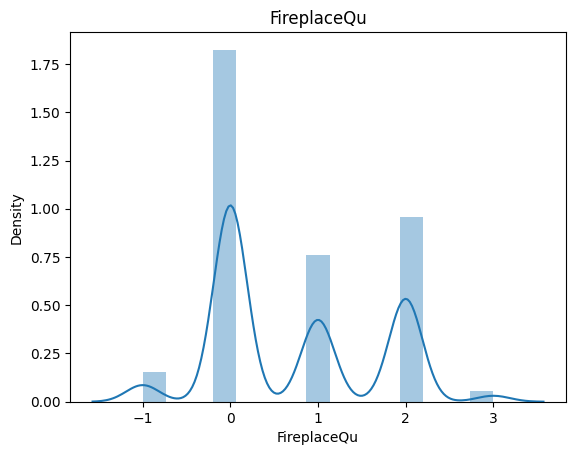

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_26827/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


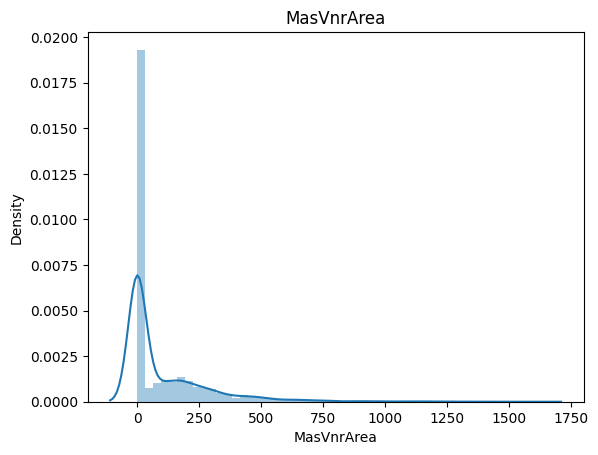

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_26827/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


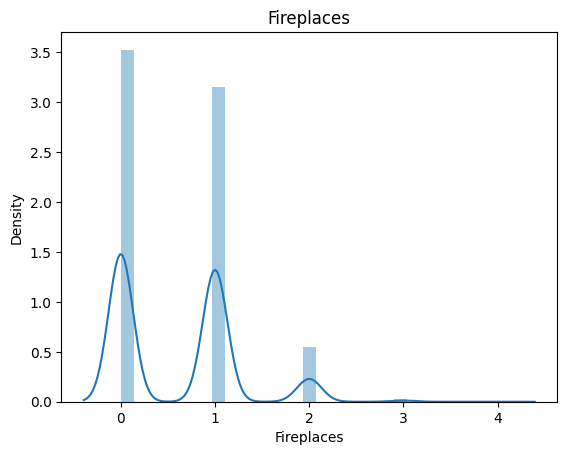

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_26827/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


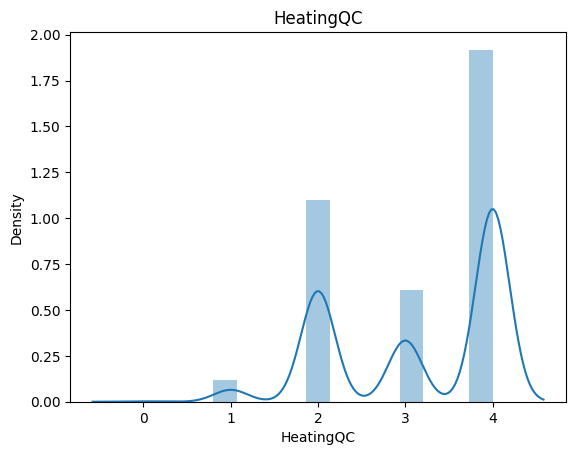

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_26827/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


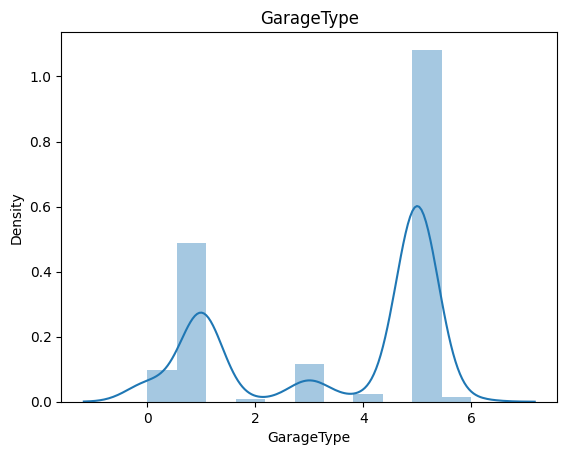

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_26827/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


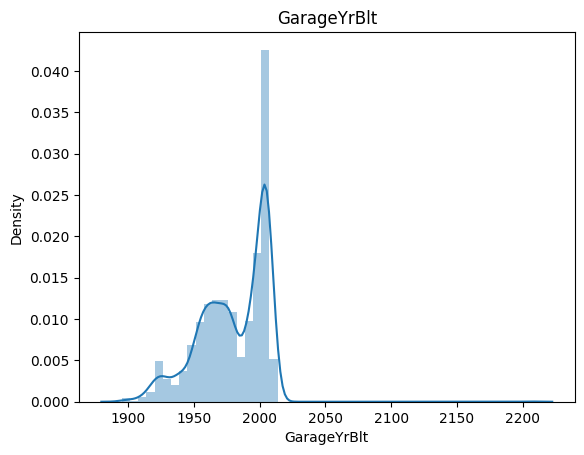

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_26827/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


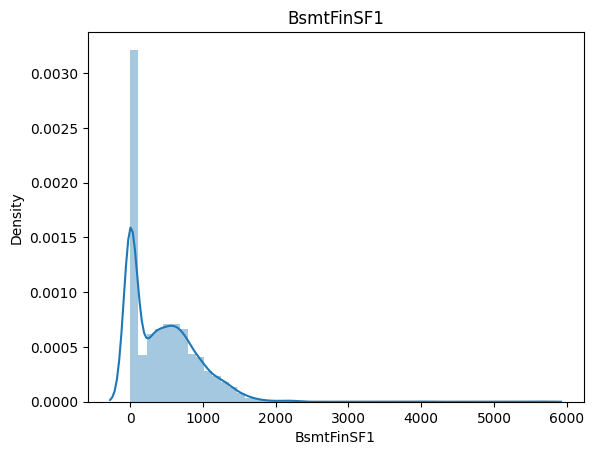

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_26827/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


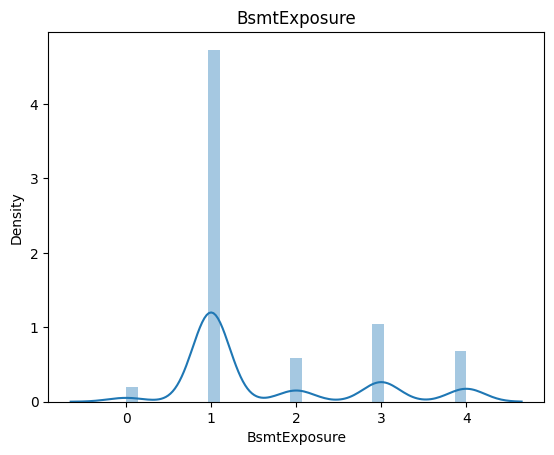

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_26827/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


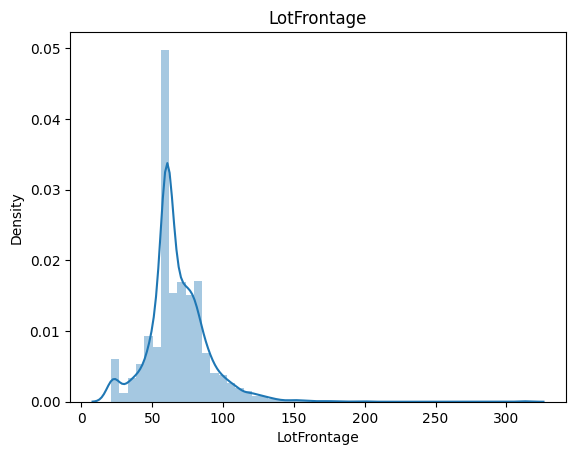

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_26827/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


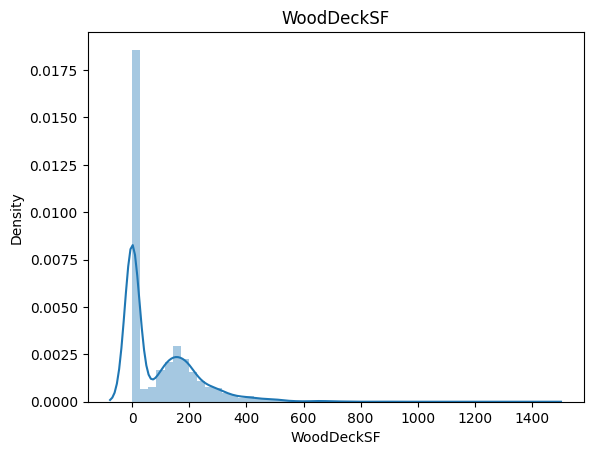

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_26827/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


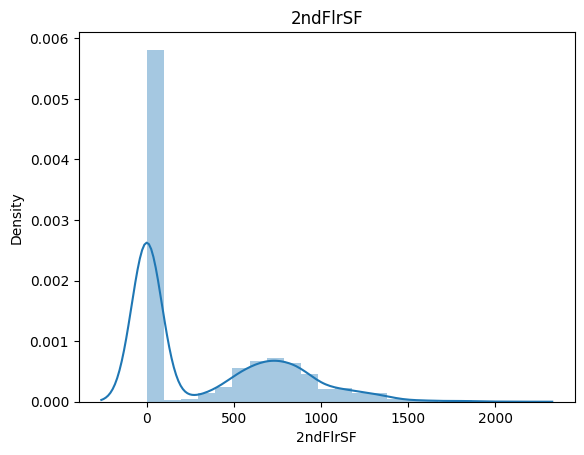

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_26827/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


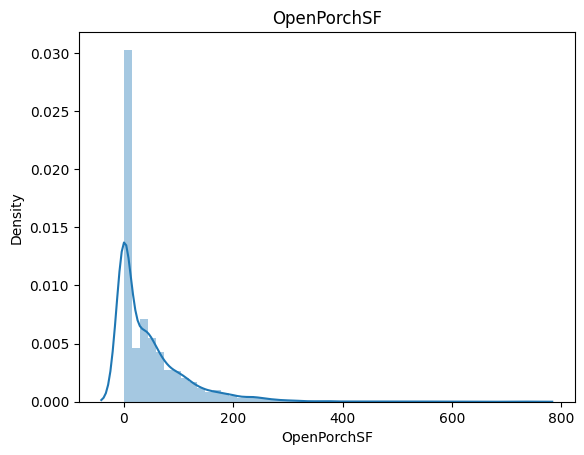

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_26827/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


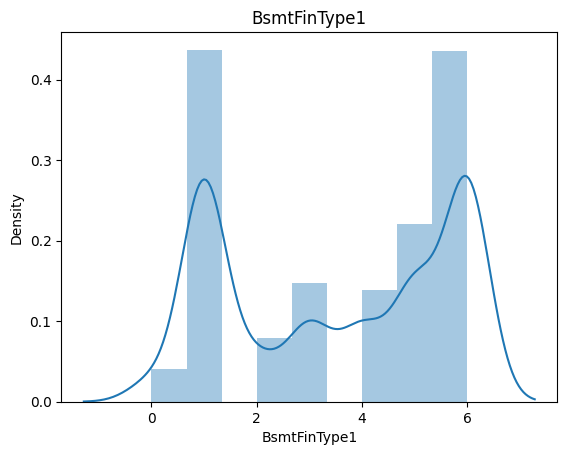

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_26827/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


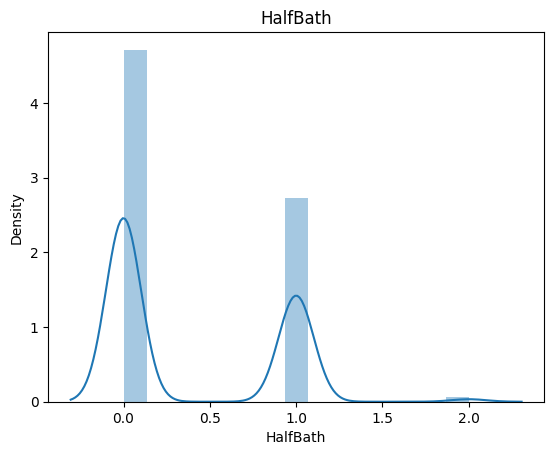

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_26827/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


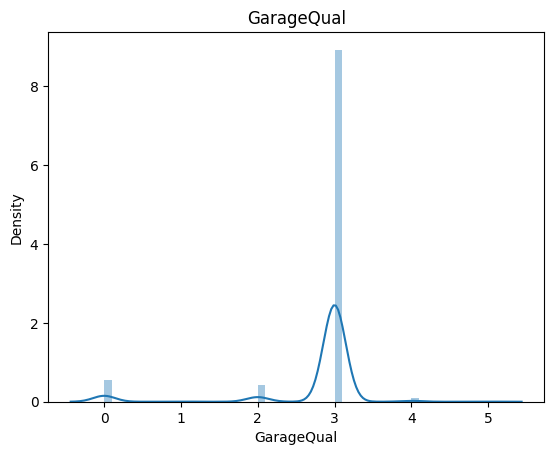

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_26827/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


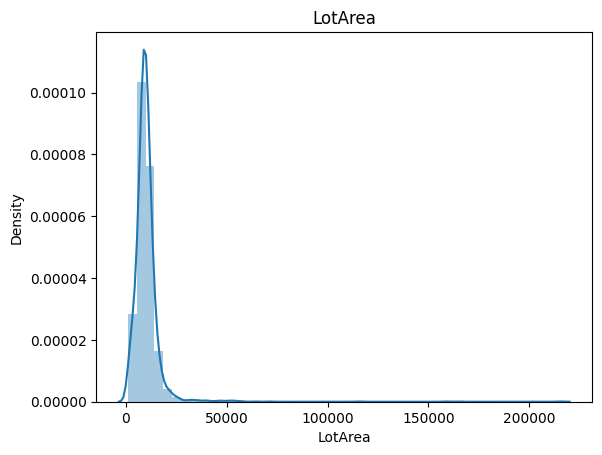

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_26827/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


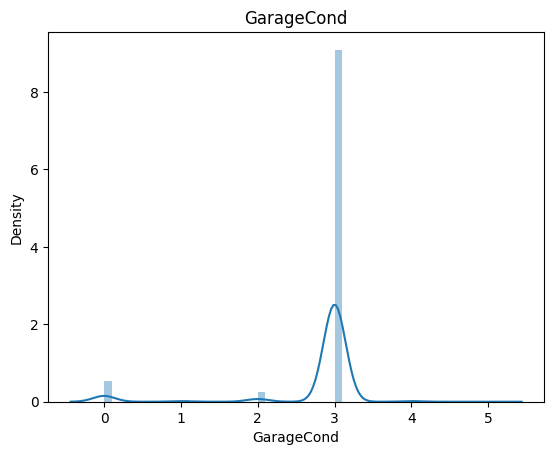

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_26827/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


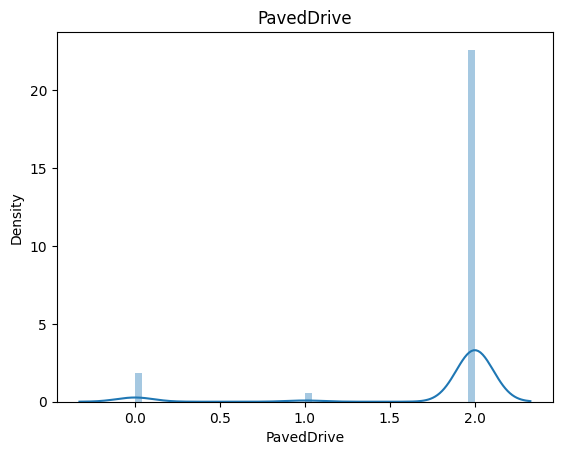

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_26827/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


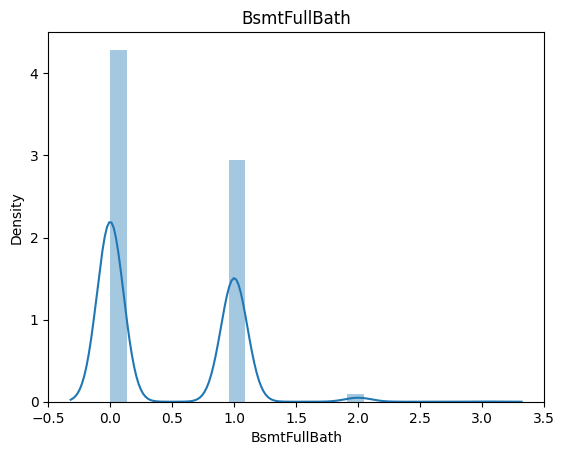

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_26827/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


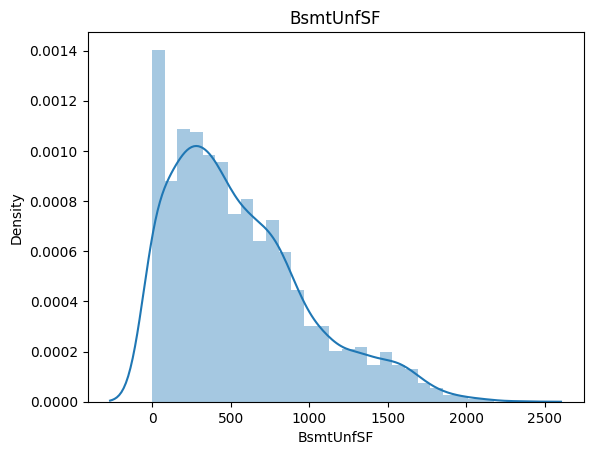

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_26827/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


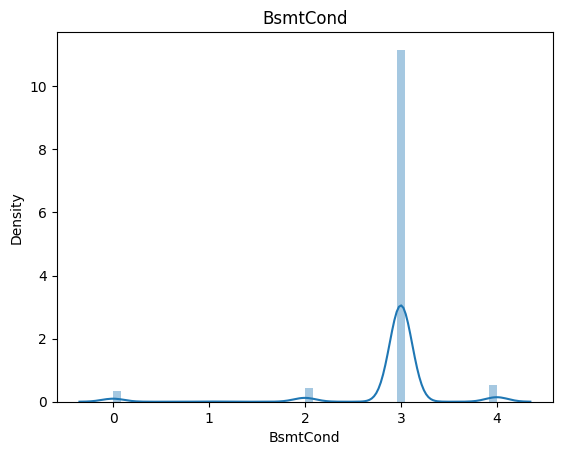

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_26827/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


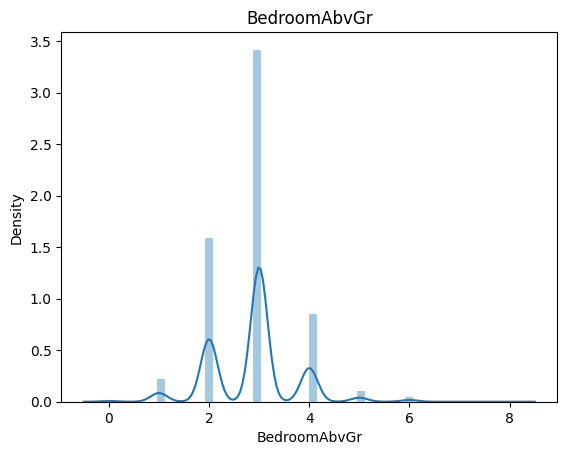

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_26827/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


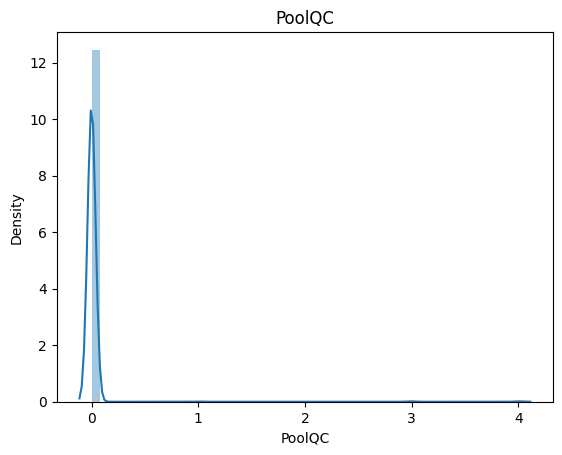

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_26827/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


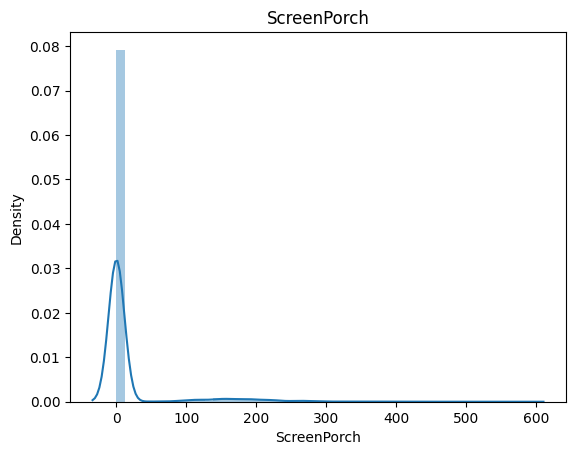

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_26827/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


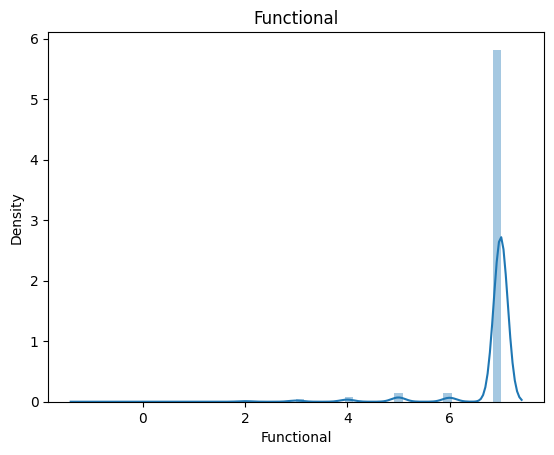

In [15]:
for i in top_40_features:
    sns.distplot(df[i])
    plt.title(i)  # Add feature name as title
    plt.show()  # Display the plot
    plt.close()  # Close the plot to avoid overlapping figures

In [16]:
def detect_and_cap_outliers(df, columns, num_stds=3):
    for col in columns:
        upper_limit = df[col].mean() + num_stds * df[col].std()
        lower_limit = df[col].mean() - num_stds * df[col].std()
        df.loc[df[col] > upper_limit, col] = upper_limit
        df.loc[df[col] < lower_limit, col] = lower_limit

    return df

In [17]:
columns_to_check = ['GrLivArea', 'TotalBsmtSF', 'GarageArea', '1stFlrSF', 'MasVnrArea', 'GarageYrBlt', 
                    'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', 'SalePrice']

In [18]:
df = detect_and_cap_outliers(df.copy(), columns_to_check)

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_26827/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


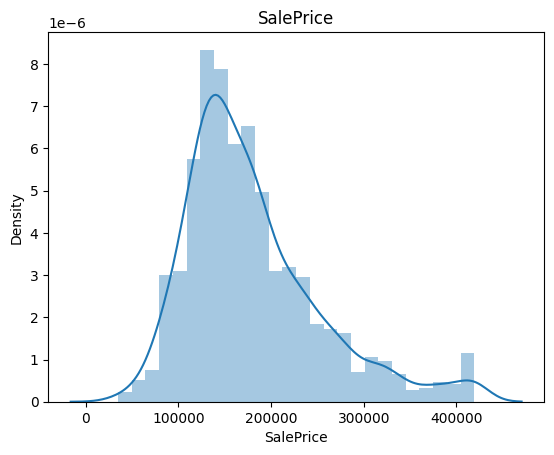

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_26827/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


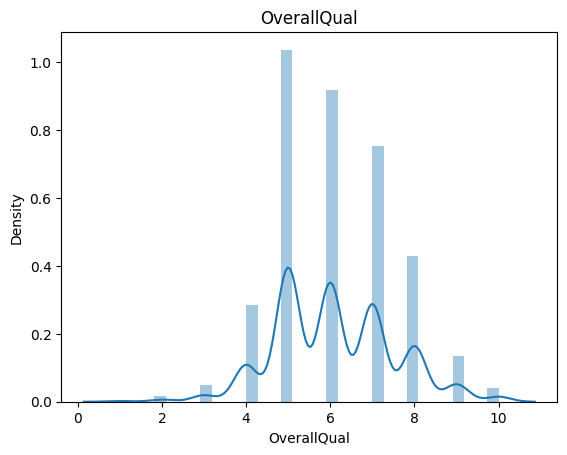

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_26827/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


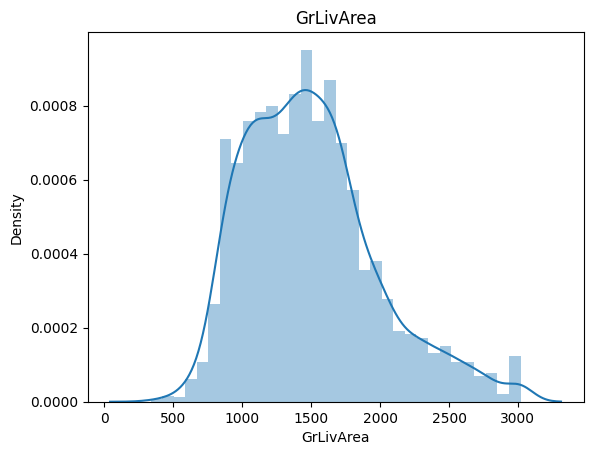

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_26827/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


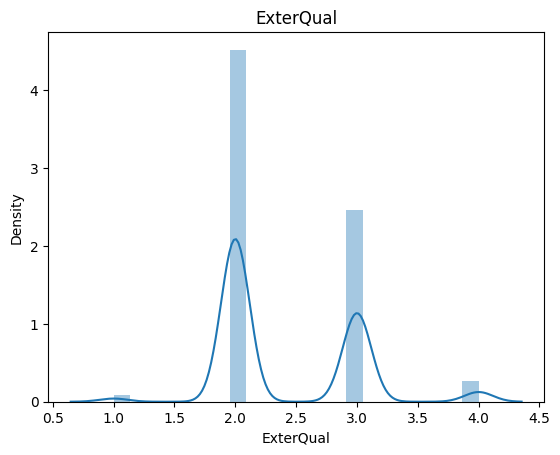

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_26827/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


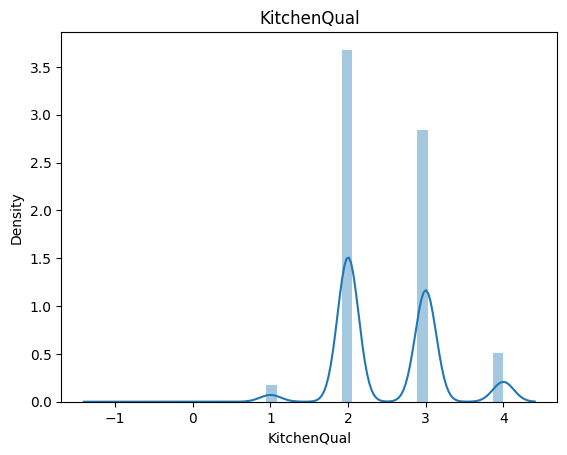

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_26827/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


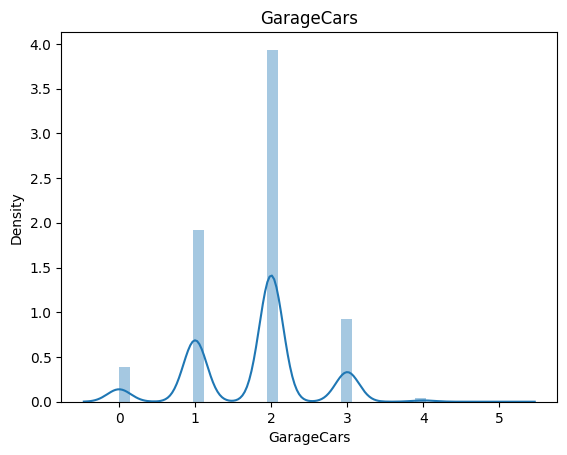

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_26827/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


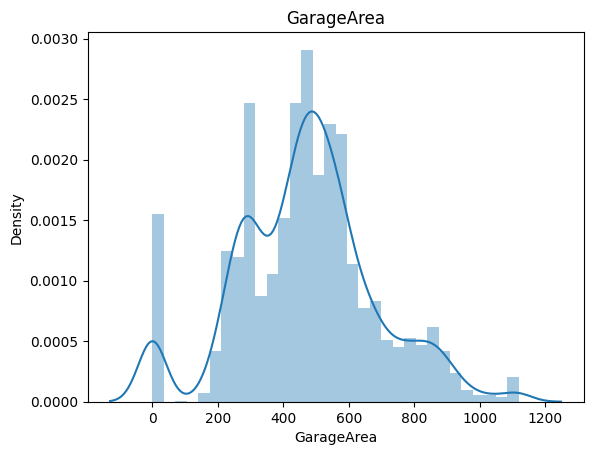

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_26827/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


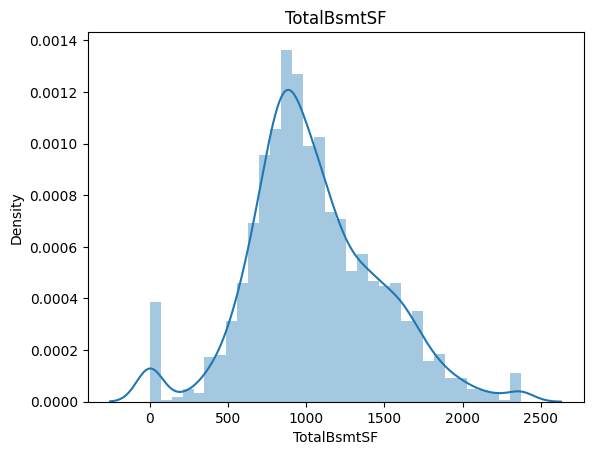

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_26827/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


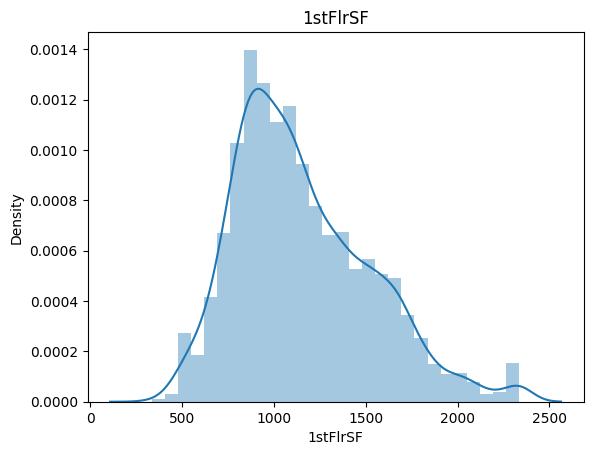

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_26827/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


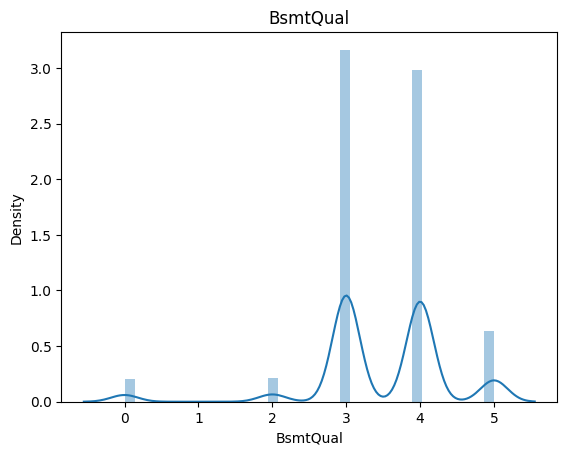

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_26827/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


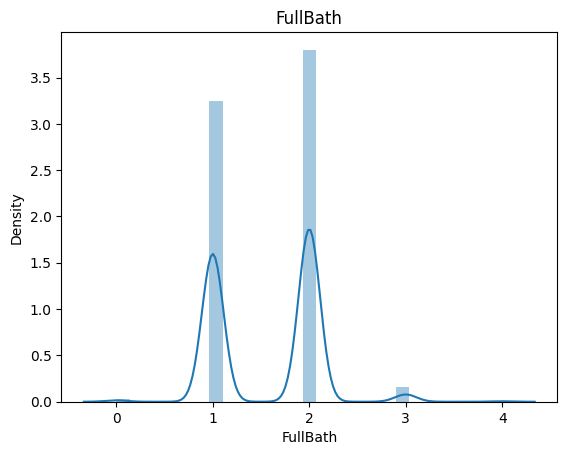

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_26827/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


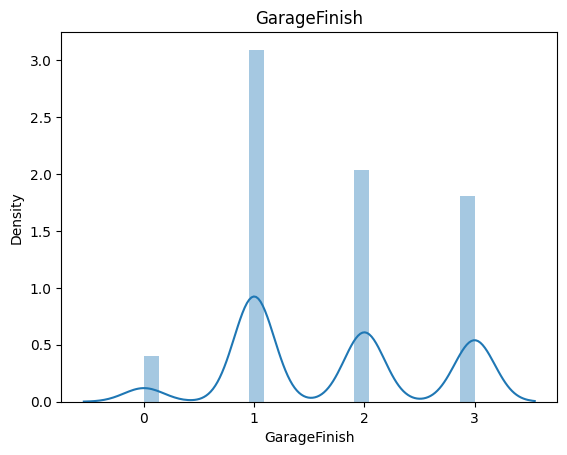

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_26827/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


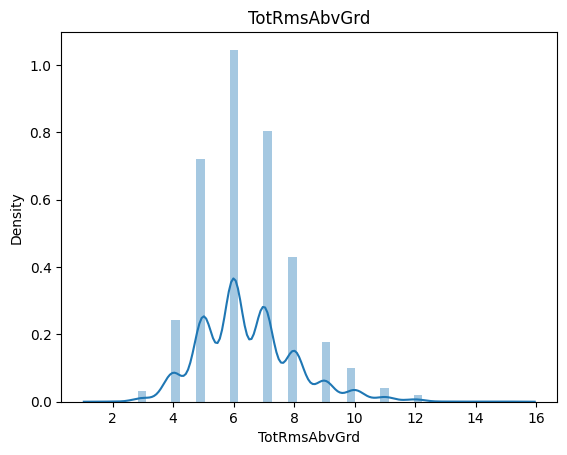

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_26827/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


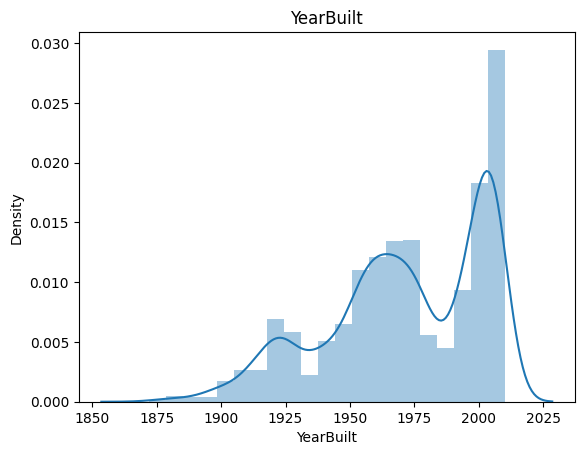

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_26827/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


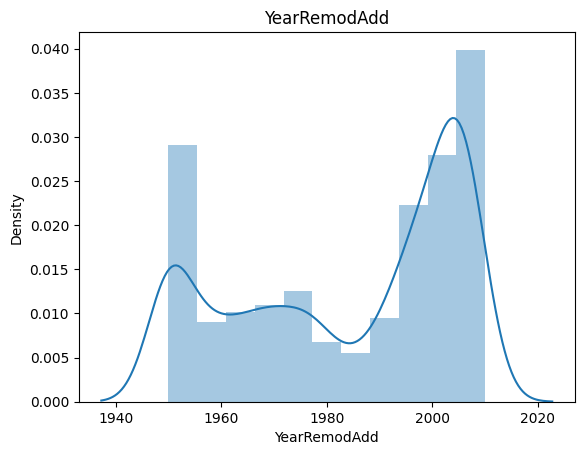

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_26827/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


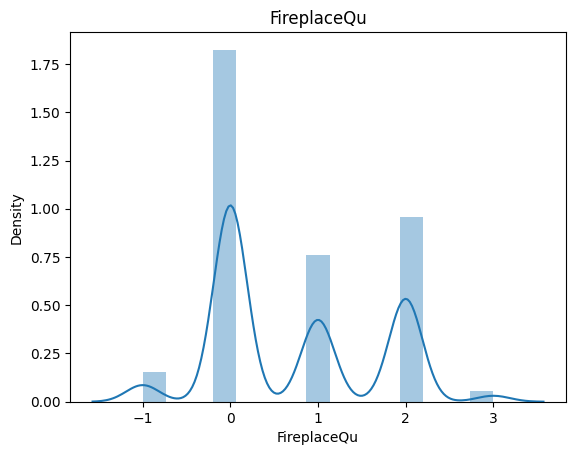

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_26827/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


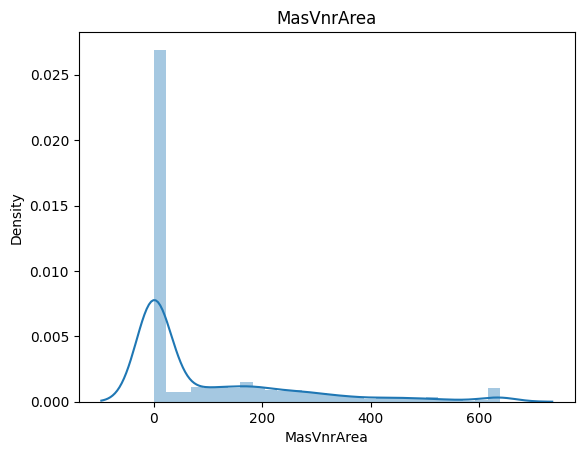

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_26827/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


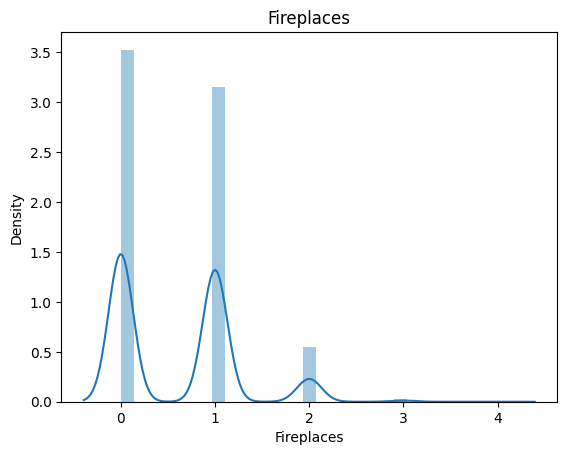

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_26827/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


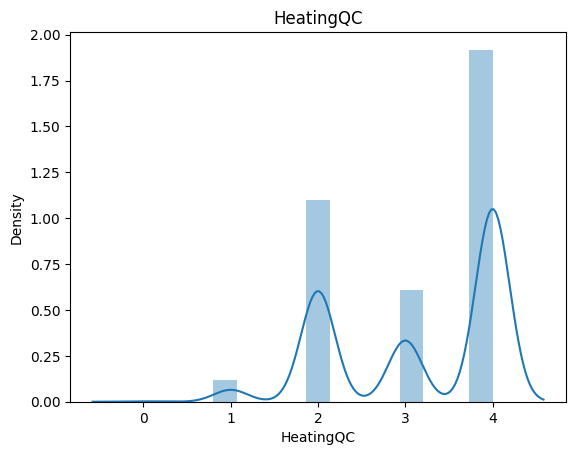

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_26827/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


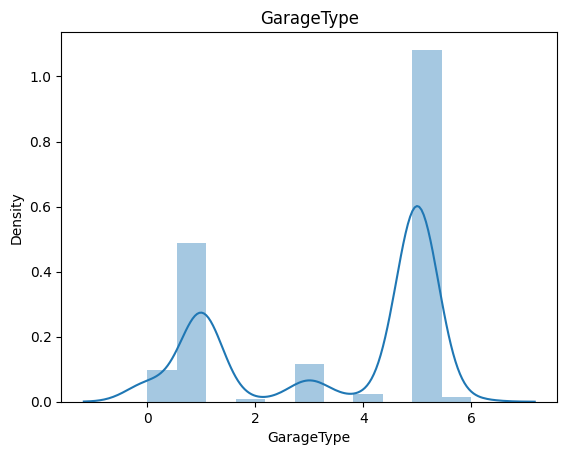

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_26827/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


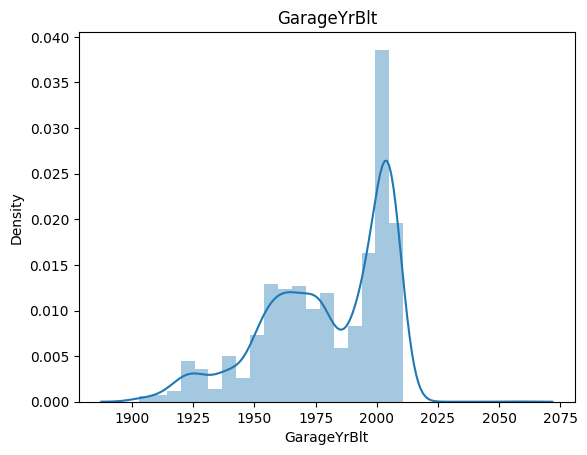

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_26827/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


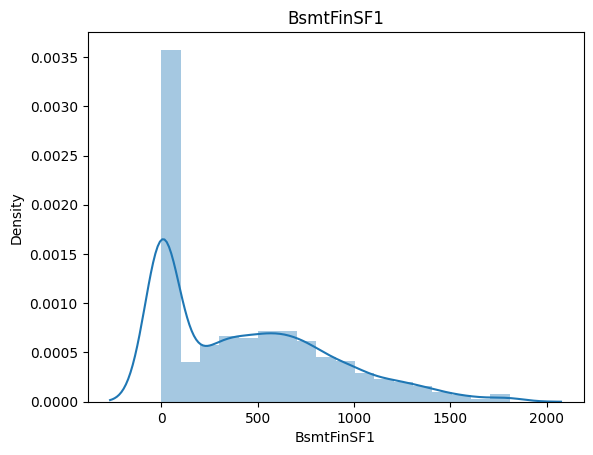

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_26827/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


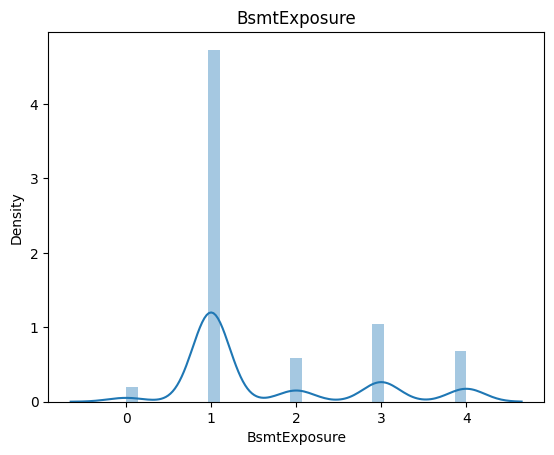

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_26827/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


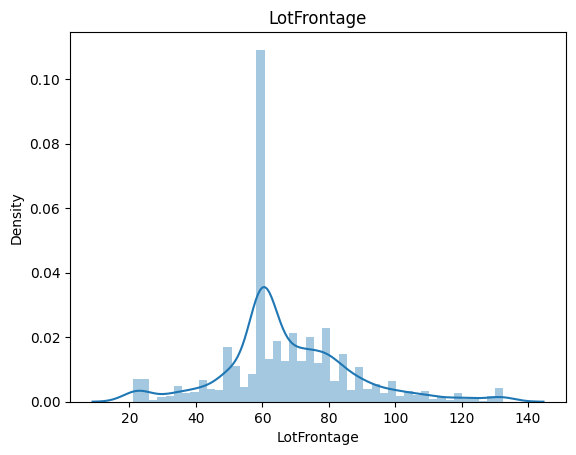

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_26827/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


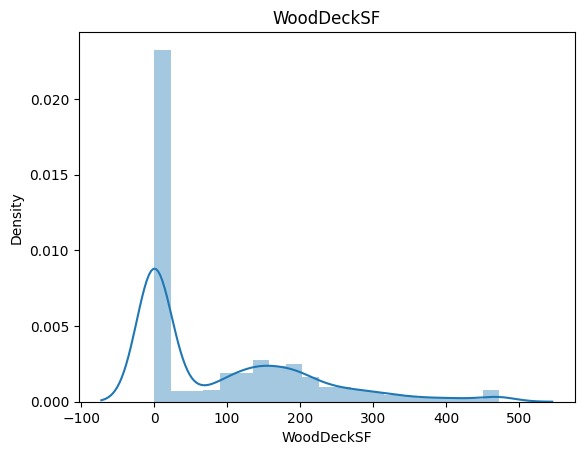

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_26827/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


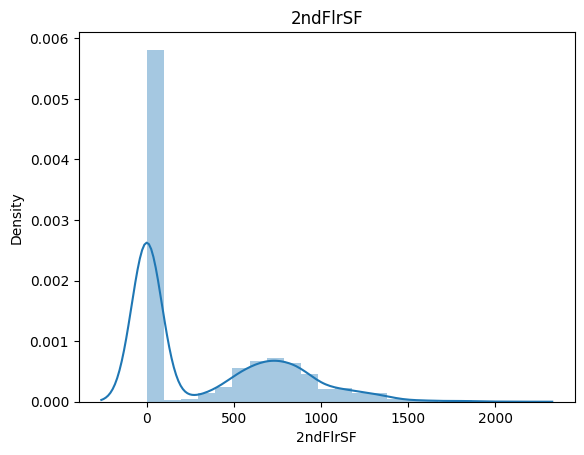

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_26827/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


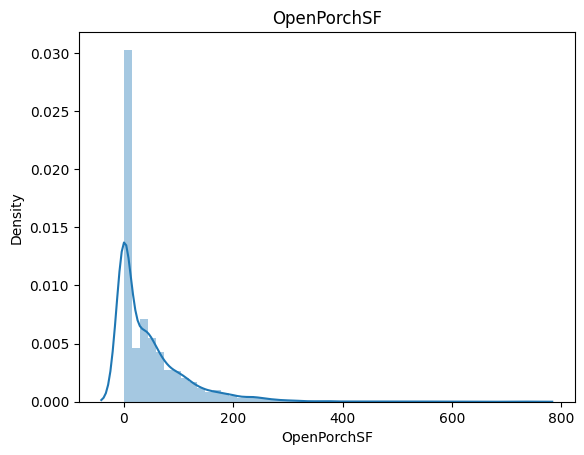

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_26827/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


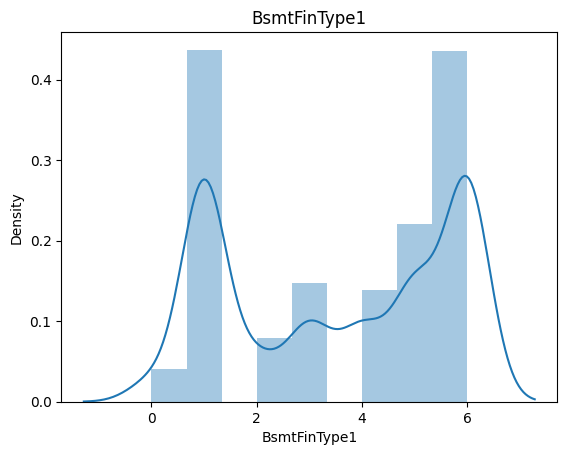

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_26827/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


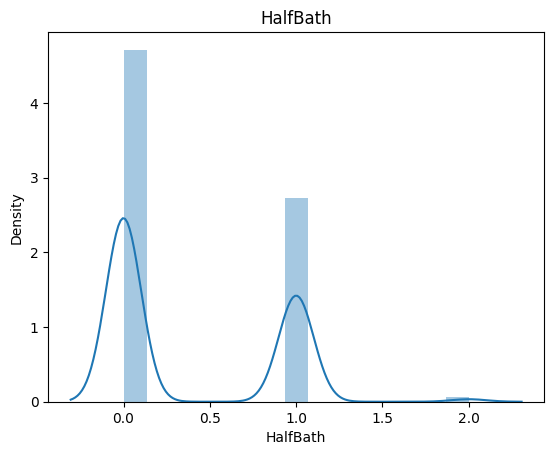

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_26827/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


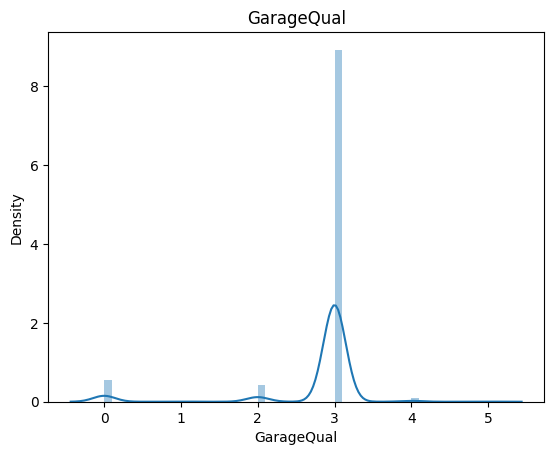

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_26827/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


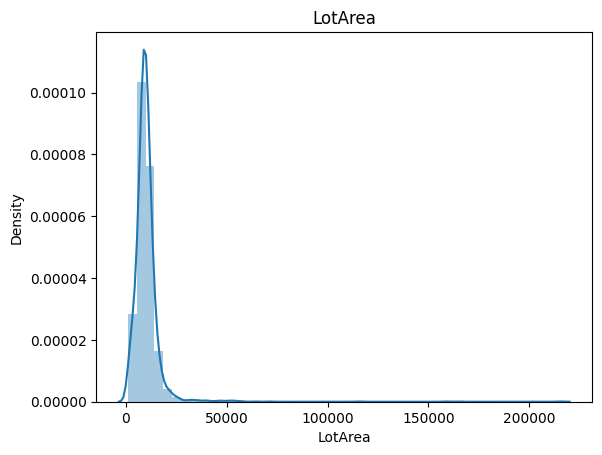

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_26827/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


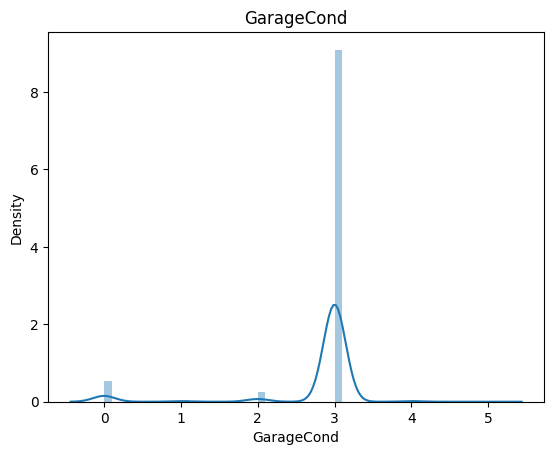

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_26827/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


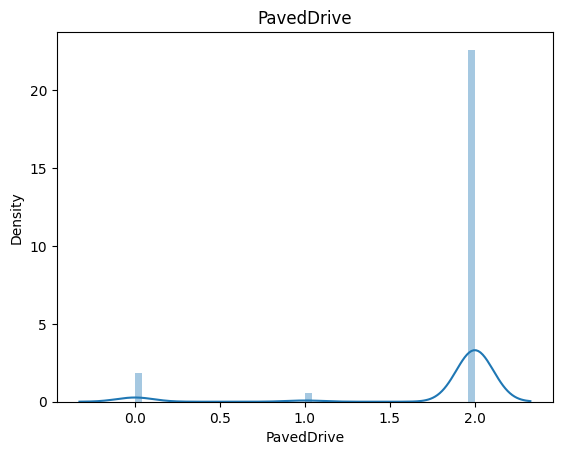

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_26827/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


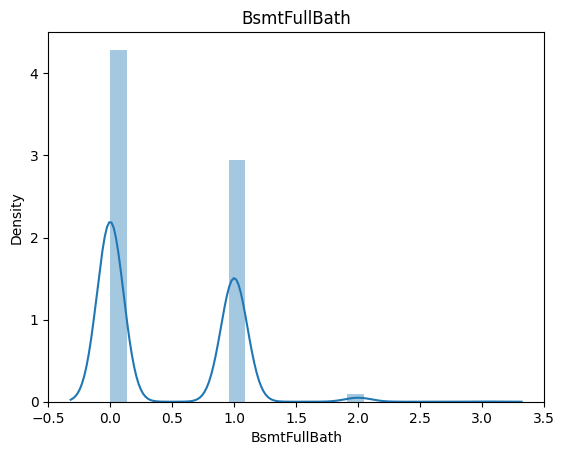

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_26827/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


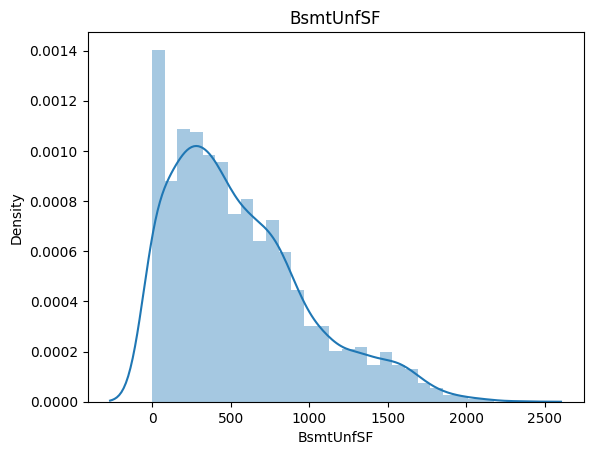

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_26827/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


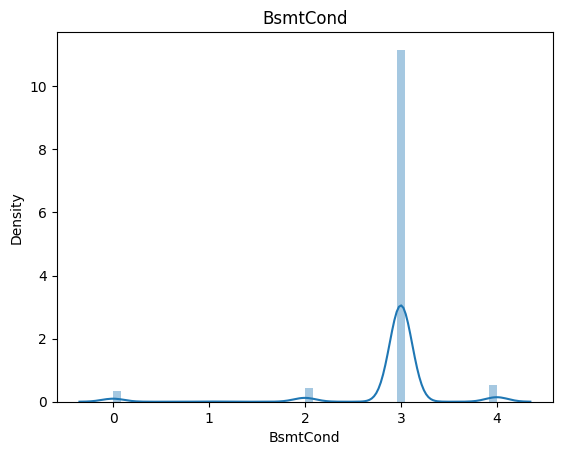

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_26827/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


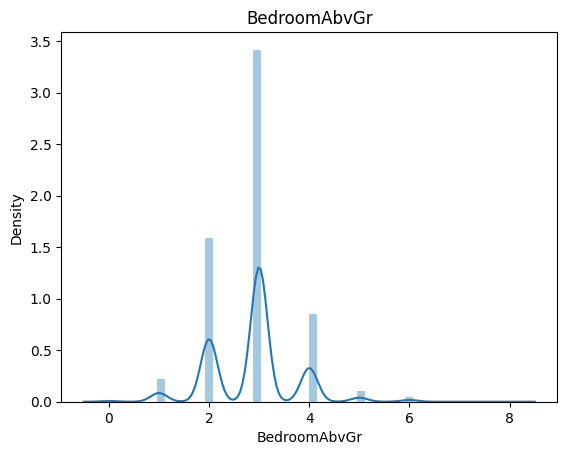

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_26827/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


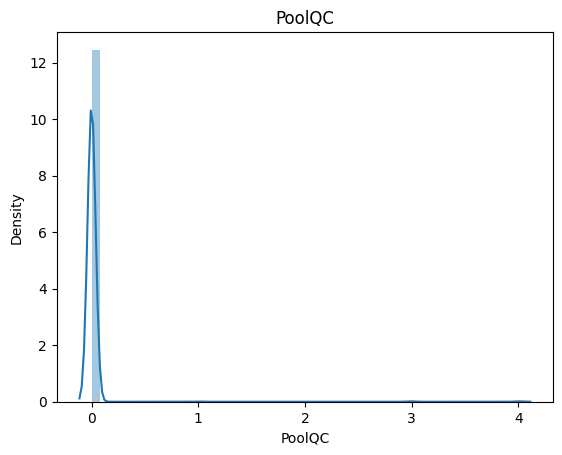

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_26827/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


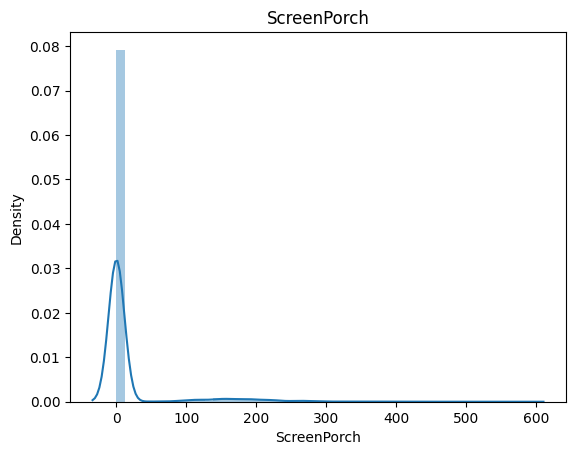

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_26827/4095848212.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


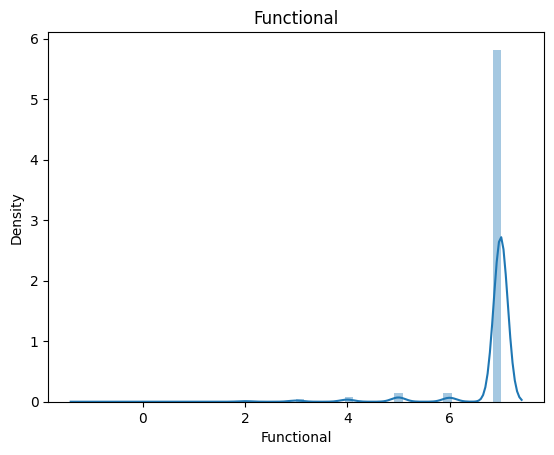

In [19]:
for i in top_40_features:
    sns.distplot(df[i])
    plt.title(i)  # Add feature name as title
    plt.show()  # Display the plot
    plt.close()  # Close the plot to avoid overlapping figures

In [20]:
new_df_40 = df[top_40_features]
new_df_40.head()

,SalePrice,OverallQual,GrLivArea,ExterQual,KitchenQual,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,BsmtQual,FullBath,GarageFinish,TotRmsAbvGrd,YearBuilt,YearRemodAdd,FireplaceQu,MasVnrArea,Fireplaces,HeatingQC,GarageType,GarageYrBlt,BsmtFinSF1,BsmtExposure,LotFrontage,WoodDeckSF,2ndFlrSF,OpenPorchSF,BsmtFinType1,HalfBath,GarageQual,LotArea,GarageCond,PavedDrive,BsmtFullBath,BsmtUnfSF,BsmtCond,BedroomAbvGr,PoolQC,ScreenPorch,Functional
0,208500.0,7,1710.0,3,3,2.0,548.0,856.0,856.0,4,2,2,8,2003,2003,0,196.0,0,4,5,2003.0,706.0,1,65.0,0.0,854,61,6,1,3,8450,3,2,1.0,150.0,3,3,0,0,7
1,181500.0,6,1262.0,2,2,2.0,460.0,1262.0,1262.0,4,2,2,6,1976,1976,1,0.0,1,4,5,1976.0,978.0,4,80.0,298.0,0,0,5,0,3,9600,3,2,0.0,284.0,3,3,0,0,7
2,223500.0,7,1786.0,3,3,2.0,608.0,920.0,920.0,4,2,2,6,2001,2002,1,162.0,1,4,5,2001.0,486.0,2,68.0,0.0,866,42,6,1,3,11250,3,2,1.0,434.0,3,3,0,0,7
3,140000.0,7,1717.0,2,3,3.0,642.0,756.0,961.0,3,1,1,7,1915,1970,2,0.0,1,3,1,1998.0,216.0,1,60.0,0.0,756,35,5,0,3,9550,3,2,1.0,540.0,4,3,0,0,7
4,250000.0,8,2198.0,3,3,3.0,836.0,1145.0,1145.0,4,2,2,9,2000,2000,1,350.0,1,4,5,2000.0,655.0,3,84.0,192.0,1053,84,6,1,3,14260,3,2,1.0,490.0,3,4,0,0,7


In [21]:
new_df_40.drop(columns=['SalePrice', 'GarageCars', 'BsmtFinType1', 'Fireplaces'],inplace=True)
scaling_features = [i for i in new_df_40.columns if df[i].dtype != 'O']
scaling_features

/var/folders/k7/z45lht4x50zg8cqjb_tpc2th0000gp/T/ipykernel_26827/2038709612.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_40.drop(columns=['SalePrice', 'GarageCars', 'BsmtFinType1', 'Fireplaces'],inplace=True)


['OverallQual',
 'GrLivArea',
 'ExterQual',
 'KitchenQual',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'BsmtQual',
 'FullBath',
 'GarageFinish',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd',
 'FireplaceQu',
 'MasVnrArea',
 'HeatingQC',
 'GarageType',
 'GarageYrBlt',
 'BsmtFinSF1',
 'BsmtExposure',
 'LotFrontage',
 'WoodDeckSF',
 '2ndFlrSF',
 'OpenPorchSF',
 'HalfBath',
 'GarageQual',
 'LotArea',
 'GarageCond',
 'PavedDrive',
 'BsmtFullBath',
 'BsmtUnfSF',
 'BsmtCond',
 'BedroomAbvGr',
 'PoolQC',
 'ScreenPorch',
 'Functional']

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
scaler = MinMaxScaler()
scaler.fit(new_df_40[scaling_features])
scaled_data = scaler.transform(df[scaling_features])
scaled_data

array([[0.66666667, 0.51249333, 0.66666667, ..., 0.        , 0.        ,
        1.        ],
       [0.55555556, 0.34563504, 0.33333333, ..., 0.        , 0.        ,
        1.        ],
       [0.66666667, 0.54079965, 0.66666667, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.44444444, 0.33148188, 0.33333333, ..., 0.        , 0.        ,
        1.        ],
       [0.44444444, 0.23687919, 0.33333333, ..., 0.        , 0.        ,
        1.        ],
       [0.66666667, 0.62050428, 0.33333333, ..., 0.        , 0.        ,
        1.        ]])

In [24]:
# Check that the shapes are consistent

print('df_final shape:', df.shape)
print('df_train shape:', data_train.shape)
print('df_test shape:',  data_test.shape)

X_Train = pd.DataFrame(new_df_40[:1460])
X_Test  = pd.DataFrame(new_df_40[1460:])
Y_Train = data_train['SalePrice']

print('\nCheck that the datasets are consistent:\n')
print('X_train shape', X_Train.shape)
print('Y_train shape:', Y_Train.shape)
print('X_test shape:',  X_Test.shape)

df_final shape: (2919, 81)
df_train shape: (1460, 81)
df_test shape: (1459, 80)

Check that the datasets are consistent:

X_train shape (1460, 36)
Y_train shape: (1460,)
X_test shape: (1459, 36)


In [25]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Split the training set into training and test set

X_train, X_test, Y_train, Y_test = train_test_split(X_Train, Y_Train, train_size=0.8, test_size=0.2,random_state=0)
     

In [26]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

In [27]:
linear_model.fit(X_train, Y_train)

LinearRegression()

In [28]:
y_pred = linear_model.predict(X_test)

In [29]:
from sklearn.metrics import mean_absolute_error as mse
mse(y_pred, Y_test)

21741.743087206392

In [30]:
from sklearn.ensemble import RandomForestRegressor

In [31]:
forest_regressor = RandomForestRegressor(n_estimators=10)  # Adjust hyperparameters as needed

In [32]:
forest_regressor.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=10)

In [33]:
y_pred_1 = forest_regressor.predict(X_test)

In [34]:
mse(y_pred_1, Y_test)

18110.98561643836

In [35]:
from sklearn import tree

model_tree = tree.DecisionTreeClassifier(criterion="gini", max_depth=40, random_state=42)  # Adjust hyperparameters as needed


In [36]:
model_tree.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=40, random_state=42)

In [37]:
y_pred_tree = model_tree.predict(X_test)

In [38]:
mse(y_pred_tree, Y_test)

33876.78424657534

In [39]:
!pip install xgboost
from xgboost import XGBRegressor


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [40]:
model_v = XGBRegressor()

In [41]:
model_v.learning_rate = 0.1
model_v.n_estimators = 60

In [42]:
model_v.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=60, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [43]:
y_pred_v = model_v.predict(X_test)

In [44]:
mse(y_pred_v, Y_test)

17215.78154430651

In [45]:
from sklearn.metrics import r2_score

In [46]:
# R2 score of linear_model.
r2_linear_model = r2_score(Y_test, y_pred)
print(r2_linear_model)

0.7960807980008237


<Axes: xlabel='SalePrice'>

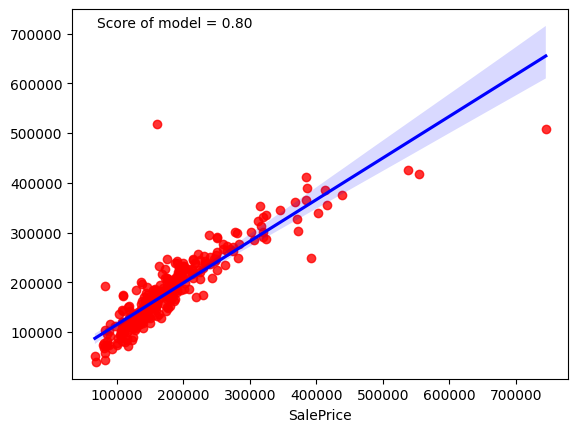

In [47]:
# reg plot of linear model
plt.text(0.05, 0.95, f"Score of model = {r2_linear_model:.2f}", transform=plt.gca().transAxes)  # Adjust position as needed
sns.regplot(x=Y_test, y=y_pred, color='red', line_kws={'color': 'blue'})

In [48]:
# R2 score of random_forest_model.
r2_random_model = r2_score(Y_test, y_pred_1)
print(r2_random_model)

0.8683608391565807


<Axes: xlabel='SalePrice'>

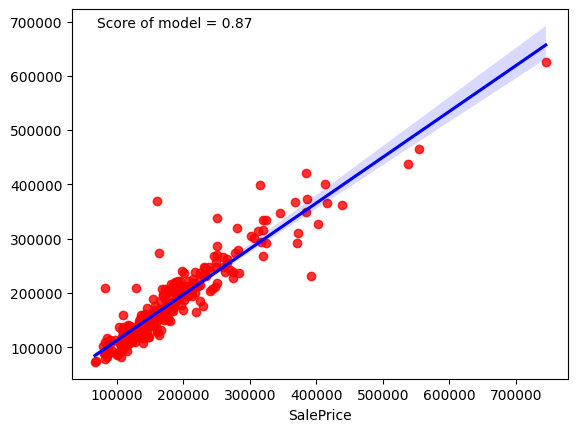

In [49]:
# reg plot for random forest model.
plt.text(0.05, 0.95, f"Score of model = {r2_random_model:.2f}", transform=plt.gca().transAxes)  # Adjust position as needed
sns.regplot(x=Y_test, y=y_pred_1, color='red', line_kws={'color': 'blue'})

In [50]:
# R2 score of decision_tree_model.
r2_tree_model = r2_score(Y_test, y_pred_tree)
print(r2_tree_model)

0.5676709890625823


<Axes: xlabel='SalePrice'>

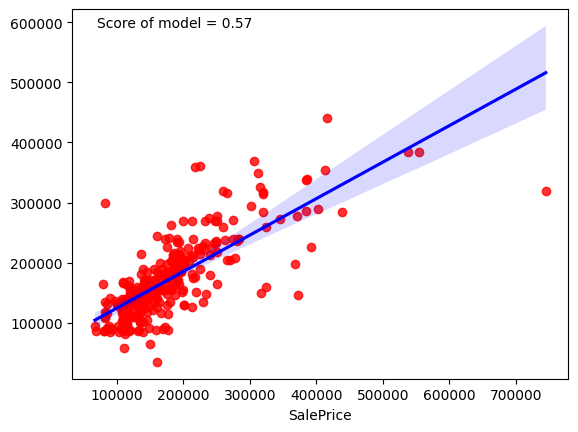

In [51]:
# reg plot for decision tree model.
plt.text(0.05, 0.95, f"Score of model = {r2_tree_model:.2f}", transform=plt.gca().transAxes)  # Adjust position as needed
sns.regplot(x=Y_test, y=y_pred_tree, color='red', line_kws={'color': 'blue'})

In [52]:
# R2 score of xgboost_model.
r2_xgboost_model = r2_score(Y_test, y_pred_v)
print(r2_xgboost_model)

0.8854521094840108


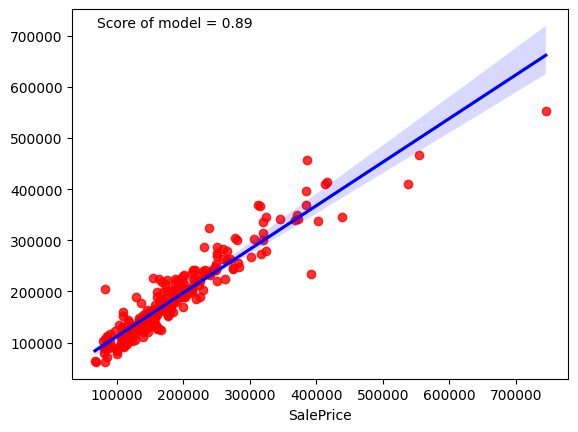

In [53]:
# reg plot for XGBRegressor model.
plt.text(0.05, 0.95, f"Score of model = {r2_xgboost_model:.2f}", transform=plt.gca().transAxes)  # Adjust position as needed
sns.regplot(x=Y_test, y=y_pred_v, color='red', line_kws={'color': 'blue'})
plt.show()

#### We have concluded that the r2_score of XGBRegressor is higher than other models. No doubt XGBRegressor is a powerfull model. 
#### So, choose xgbregressor for further mlops.

In [54]:
# Save model
import pickle

In [56]:
with open('linear_model', 'wb') as f:
    pickle.dump(linear_model, f)

In [58]:
with open('XGBoost_model', 'wb') as f:
    pickle.dump(model_v, f)